In [28]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

class style:
   BOLD = '\033[1m'
   END = '\033[0m'

In [5]:
confirmed = pd.read_csv("time_series_covid_19_confirmed.csv")
death = pd.read_csv("time_series_covid_19_deaths.csv")
recover = pd.read_csv("time_series_covid_19_recovered.csv")

In [9]:
confirm_last_date=confirmed.columns[confirmed.columns.size-1]
print(confirm_last_date)

3/26/20


In [10]:
confirmedcountry=confirmed.groupby("Country/Region", as_index=False).sum()

In [11]:
confirmedcountry

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,22,22,22,24,24,40,40,74,84,94
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,55,59,64,70,76,89,104,123,146,174
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,60,74,87,90,139,201,230,264,302,367
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,39,39,53,75,88,113,133,164,188,224
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,0,0,1,2,2,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Venezuela,6.4238,-66.5897,0,0,0,0,0,0,0,...,33,36,42,42,70,70,77,84,91,107
171,Vietnam,16.0000,108.0000,0,2,2,2,2,2,2,...,66,75,85,91,94,113,123,134,141,153
172,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,0,...,39,41,44,47,48,52,59,59,59,84
173,Zambia,-15.4167,28.2833,0,0,0,0,0,0,0,...,0,2,2,2,2,3,3,3,12,16


In [32]:
#order countries by cases
ccs=confirmedcountry.sort_values(by=confirm_last_date, ascending=False).head(10)
print(style.BOLD + '\nConfirmed Cases\n' + style.END) 
print("---------------\n")
print(ccs[['Country/Region',confirm_last_date]].to_string(index=False))


Confirmed Cases

---------------

 Country/Region  3/26/20
             US    83836
          China    81782
          Italy    80589
          Spain    57786
        Germany    43938
         France    29551
           Iran    29406
 United Kingdom    11812
    Switzerland    11811
   Korea, South     9241


In [43]:
death_last_date = death.columns[death.columns.size-1]

In [20]:
deathcountry=death.groupby("Country/Region", as_index=False).sum()

In [34]:
#order countries by deaths 
dcs=deathcountry.sort_values(by=death_last_date, ascending=False).head(10)
print(style.BOLD + '\nDeaths\n' + style.END) 
print("---------------\n")

print(dcs[['Country/Region',death_last_date]].to_string(index=False))


Deaths

---------------

 Country/Region  3/26/20
          Italy     8215
          Spain     4365
          China     3291
           Iran     2234
         France     1698
             US     1209
 United Kingdom      580
    Netherlands      435
        Germany      267
        Belgium      220


In [36]:
recover_last_date = recover.columns[recover.columns.size-1]

In [37]:
recovercountry=recover.groupby("Country/Region", as_index=False).sum()

In [39]:
#order countries by recoveries 
rcs=recovercountry.sort_values(by=recover_last_date, ascending=False).head(10)
print(style.BOLD + '\nRecovers\n' + style.END) 
print("---------------\n")

print(dcs[['Country/Region',recover_last_date]].to_string(index=False))


Recovers

---------------

 Country/Region  3/26/20
          Italy     8215
          Spain     4365
          China     3291
           Iran     2234
         France     1698
             US     1209
 United Kingdom      580
    Netherlands      435
        Germany      267
        Belgium      220


In [40]:
#Highest Cases By Country
countries=ccs['Country/Region'].values
print(countries)

['US' 'China' 'Italy' 'Spain' 'Germany' 'France' 'Iran' 'United Kingdom'
 'Switzerland' 'Korea, South']


In [41]:
#Highest deaths By Country
dcountries=dcs['Country/Region'].values
print(dcountries)

['Italy' 'Spain' 'China' 'Iran' 'France' 'US' 'United Kingdom'
 'Netherlands' 'Germany' 'Belgium']


In [42]:
#Highest recover By Country
rcountries=rcs["Country/Region"].values
print(rcountries)

['China' 'Iran' 'Italy' 'Spain' 'Germany' 'France' 'Korea, South' 'US'
 'Belgium' 'Diamond Princess']


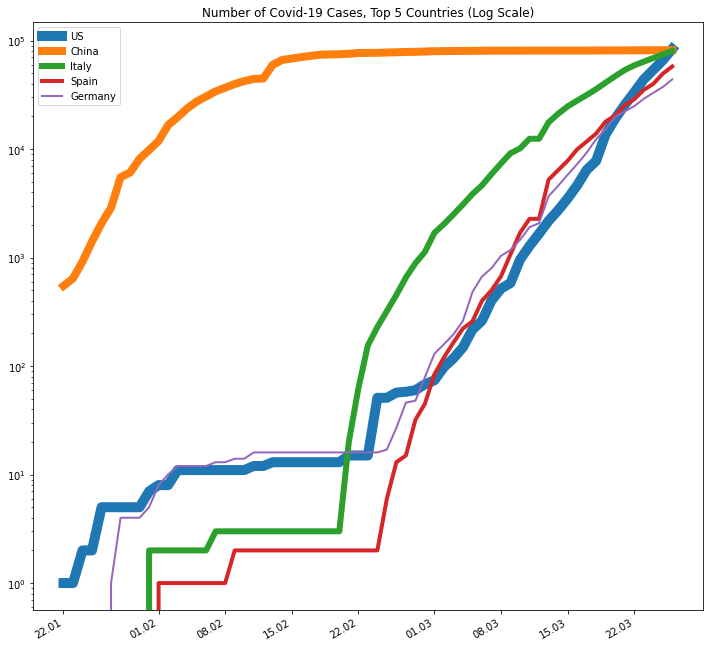

In [72]:
# top 5 countries by number of confirmed cases => Log scale
zerodate = datetime.datetime(2020, 1, 22) 
d = confirmed.columns.size-4
date0 = [zerodate + datetime.timedelta(days=i) for i in range(d)]

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in countries[0:5]:
    scdata=ccs.loc[ccs['Country/Region']==country].values[:,3:][0]
    ax.set_yscale('log')
    ax.plot(date0,scdata, label='%s' % country, linewidth=12-2*i)
    myFmt = DateFormatter("%d.%m")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    ax.legend(loc='upper left')
    ax.set_title('Number of Covid-19 Cases, Top 5 Countries (Log Scale)')
    i=i+1
plt.show()

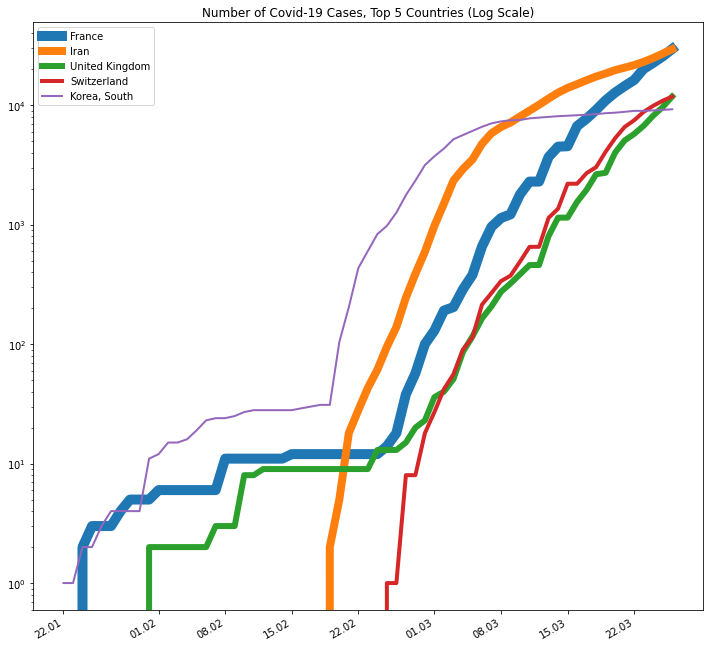

In [49]:

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in countries[5:10]:
    scdata=ccs.loc[ccs['Country/Region']==country].values[:,3:][0]
    ax.set_yscale('log')
    ax.plot(date0,scdata, label='%s' % country, linewidth=12-2*i)
    myFmt = DateFormatter("%d.%m")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    ax.legend(loc='upper left')
    ax.set_title('Number of Covid-19 Cases, Top 5 Countries (Log Scale)')
    i=i+1
plt.show()

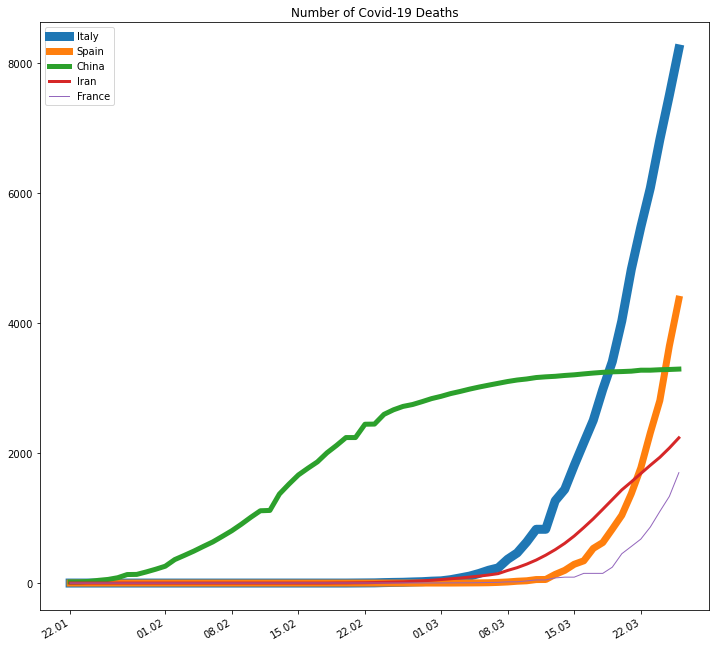

In [57]:
# top 5 countries by number of deaths => Log scale

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in dcountries[0:5]:
    scdata=dcs.loc[dcs['Country/Region']==country].values[:,3:][0]
    ax.plot(date0,scdata, label='%s' % country, linewidth=11-2*i)
    myFmt = DateFormatter("%d.%m")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    ax.legend(loc='upper left')
    ax.set_title('Number of Covid-19 Deaths')
    i=i+1
plt.show()

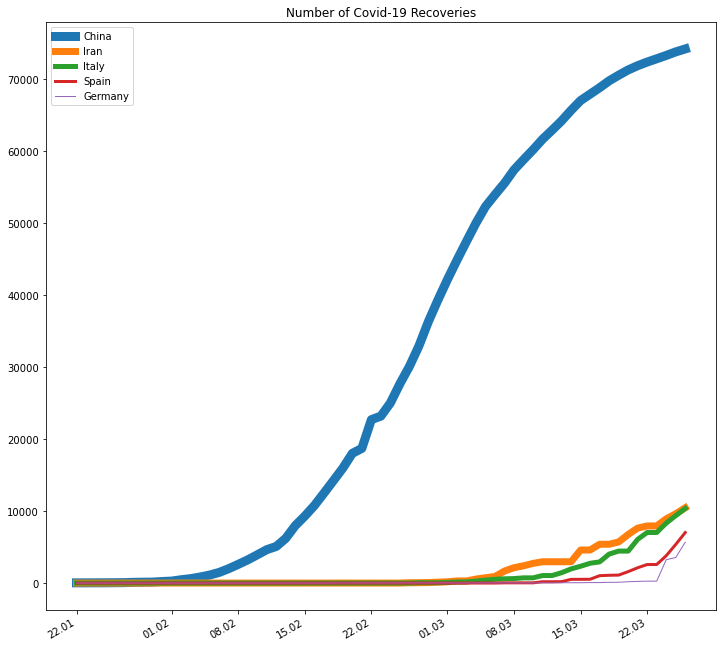

In [56]:
# top 5 countries by number of recoveries => Log scale

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in rcountries[0:5]:
    scdata=rcs.loc[rcs['Country/Region']==country].values[:,3:][0]
    ax.plot(date0,scdata, label='%s' % country, linewidth=11-2*i)
    myFmt = DateFormatter("%d.%m")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    ax.legend(loc='upper left')
    ax.set_title('Number of Covid-19 Recoveries')
    i=i+1
plt.show()

In [59]:
# cases in India
indiadata=confirmed.loc[confirmed['Country/Region']=='India'].values[:,4:][0]
print(indiadata)

[0 0 0 0 0 0 0 0 1 1 1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 5 5 28 30 31 34 39 43 56 62 73 82 102 113 119 142 156 194 244 330
 396 499 536 657 727]


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

LR = LinearRegression()
d = np.arange(indiadata.size).reshape(-1,1)

# degree => 7 
quad = PolynomialFeatures(degree=7)
X_quad = quad.fit_transform(d)

LR.fit(X_quad, indiadata)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
# next 30 days forecast
from sklearn.metrics import r2_score

d_fit = np.arange(0, indiadata.size+14)[:, np.newaxis]
y_poly_fit = LR.predict(quad.fit_transform(d_fit))
quad_r2 = r2_score(indiadata, LR.predict(X_quad))

# coefficiants of the regression polynomial
print(LR.coef_)

# R^2 score
print("\nR^2 =", quad_r2)

[ 0.00000000e+00 -3.53698355e+00  7.37850354e-01 -5.34103985e-02
  1.64191273e-03 -1.85791845e-05 -4.71957369e-08  1.72899783e-09]

R^2 = 0.9955742280303987


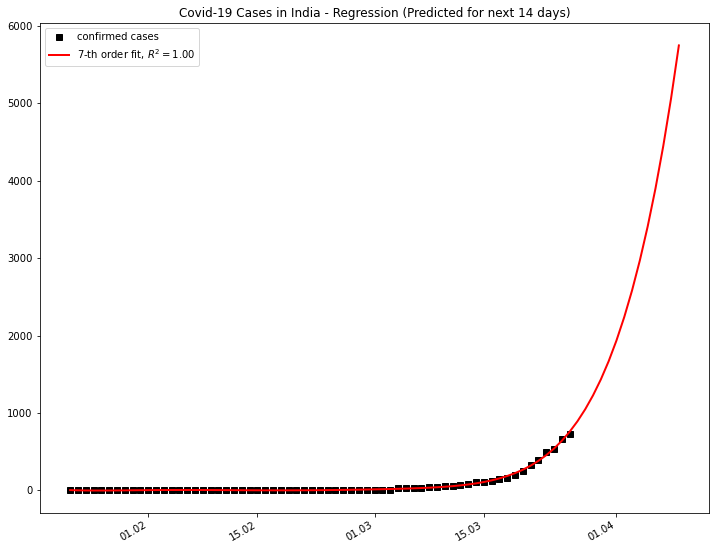

In [70]:
# plot regression for next 14 days

date = [zerodate + datetime.timedelta(days=i) for i in range(len(d_fit))]
fig, ax = plt.subplots(figsize=(12, 10)) 
ax.plot(date0,indiadata,'s',color='black',label='confirmed cases')
ax.plot(date, y_poly_fit,label='$7$-th order fit, $R^2=%.2f$' % quad_r2, linestyle='-', color='red', linewidth=2)
ax.legend(loc='upper left')
ax.set_title('Covid-19 Cases in India - Regression (Predicted for next 14 days)')
myFmt = DateFormatter("%d.%m")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()
plt.show()